In [1]:
import numpy as np
import pandas as pd
import seaborn as sms
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data= pd.read_csv("lending_club_loan_two.csv")

In [3]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [4]:
data.shape

(396030, 27)

In [5]:
# we see there are 27 variables in this model and many of them are categorical variables
# let's get some info on this data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

## 1. Data Pre-processing 

## 1.1. Duplicate Values

There are many categorical variables in our case. Before addressing them, lets pre-process the numeric part.

In [8]:
# extracting the numeric part.
data_numeric= data.select_dtypes(include=['number'])

In [9]:
data.duplicated().value_counts()

False    396030
Name: count, dtype: int64

## 1.2. Missing values 

In [11]:
data.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [12]:
# we will analyze the object data type later. Let's focus on the numeric part only for now 
data_numeric.isnull().sum()

loan_amnt                   0
int_rate                    0
installment                 0
annual_inc                  0
dti                         0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
mort_acc                37795
pub_rec_bankruptcies      535
dtype: int64

In [13]:
data['revol_util'].agg(['mean','median','min','max'])

mean       53.791749
median     54.800000
min         0.000000
max       892.300000
Name: revol_util, dtype: float64

In [14]:
data['revol_util']=data['revol_util'].fillna(data['revol_util'].median())

In [15]:
data.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [16]:
data['mort_acc'].agg(['mean','median'])

mean      1.813991
median    1.000000
Name: mort_acc, dtype: float64

In [17]:
data['mort_acc'] = data['mort_acc'].fillna(data['mort_acc'].median())

In [18]:
data.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                    0
pub_rec_bankruptcies      535
address                     0
dtype: int64

**We see that filling the public-rec-b is causing null values in other columns as well. So we hold this for now**

## 1.3. Categorical Variable Analysis

We have to most probably predict loan_status

Text(0, 0.5, 'Count')

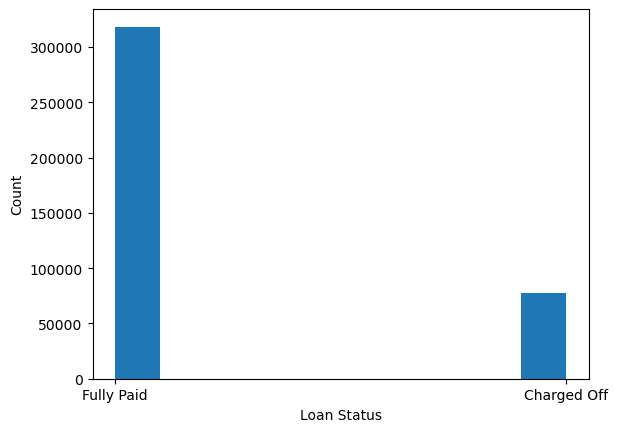

In [22]:
plt.hist(data['loan_status'])
plt.xlabel('Loan Status')
plt.ylabel('Count')

**charged off represents defaults in our data set.**<br>
Let's first account for the target categorical variable and then proceed to the remaining categorical variables in our model.

In [24]:
data = pd.get_dummies(data, columns=['loan_status'], drop_first=True)

In [25]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,loan_status_Fully Paid
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",True
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",True
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",True
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",True
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",False


In [26]:
data.groupby(['loan_status_Fully Paid']).size()

loan_status_Fully Paid
False     77673
True     318357
dtype: int64

In [27]:
# Convert boolean columns to 1 and 0
data['loan_status_Fully Paid'] = data['loan_status_Fully Paid'].astype(int)

In [28]:
data.groupby(['loan_status_Fully Paid']).size()

loan_status_Fully Paid
0     77673
1    318357
dtype: int64

In [29]:
for col in data.columns:
    if data[col].dtype== 'object':
        print(f"Number of unique values in '{col}': {data[col].nunique()}")

Number of unique values in 'term': 2
Number of unique values in 'grade': 7
Number of unique values in 'sub_grade': 35
Number of unique values in 'emp_title': 173105
Number of unique values in 'emp_length': 11
Number of unique values in 'home_ownership': 6
Number of unique values in 'verification_status': 3
Number of unique values in 'issue_d': 115
Number of unique values in 'purpose': 14
Number of unique values in 'title': 48816
Number of unique values in 'earliest_cr_line': 684
Number of unique values in 'initial_list_status': 2
Number of unique values in 'application_type': 3
Number of unique values in 'address': 393700


We see that the columns 'address','emp title', 'earliest cr line', 'title' have too many objects. It's not possible to take so many dummies in our model.
<br> we first drop the 'emp_title' column

In [31]:
data.drop('emp_title', axis=1, inplace=True)

In [32]:
# when we already have sub_grade with us, there is no need to have the grade column
data.drop('grade', axis=1, inplace=True)

In [33]:
#let's analyze term and check why it is a categorical variable when it can be made a float64
data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [34]:
#we'll assign numerical values to the categories to make them into float64
# we use dictionary appointing
term_values={' 36 months':36,' 60 months': 60}
data['term'] = data.term.map(term_values)
# the .map() function is used in pandas to apply a function or a mapping to each element in a DataFrame column i.e. transform or replace values in that column

In [35]:
#let's consider the next categorical variable, the employment length.
data.emp_length.unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [36]:
#let's see what impact does the length of employment in that profession has on defaulting
data.groupby('emp_length')['loan_status_Fully Paid'].value_counts(normalize=True)
#we use the normalize command to give us the proportional values of each category

emp_length  loan_status_Fully Paid
1 year      1                         0.800865
            0                         0.199135
10+ years   1                         0.815814
            0                         0.184186
2 years     1                         0.806738
            0                         0.193262
3 years     1                         0.804769
            0                         0.195231
4 years     1                         0.807615
            0                         0.192385
5 years     1                         0.807813
            0                         0.192187
6 years     1                         0.810806
            0                         0.189194
7 years     1                         0.805226
            0                         0.194774
8 years     1                         0.800240
            0                         0.199760
9 years     1                         0.799530
            0                         0.200470
< 1 year    1            

In [37]:
# we see that the proportional values remain more or less the same for all the lengths...hence, we can drop this variable due to poor impact
data.drop('emp_length', axis=1, inplace=True)

In [38]:
# the 'title' variable denotes the loan title provided by the borrower
data.title.unique()

array(['Vacation', 'Debt consolidation', 'Credit card refinancing', ...,
       'Credit buster ', 'Loanforpayoff', 'Toxic Debt Payoff'],
      dtype=object)

In [39]:
data.title.value_counts()

title
Debt consolidation            152472
Credit card refinancing        51487
Home improvement               15264
Other                          12930
Debt Consolidation             11608
                               ...  
Graduation/Travel Expenses         1
Daughter's Wedding Bill            1
gotta move                         1
creditcardrefi                     1
Toxic Debt Payoff                  1
Name: count, Length: 48816, dtype: int64

In [40]:
# the 'purpose' column : A category provided by the borrower for the loan request.
data['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [41]:
data.purpose.value_counts()

purpose
debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: count, dtype: int64

In [42]:
# hence, the title is a sub-category of purpose , so we go ahead and drop the title category
data.drop('title', axis=1, inplace=True)

In [43]:
# what categorical columns are we left with
for col in data.columns:
    if data[col].dtype== 'object':
        print(f"Number of unique values in '{col}': {data[col].nunique()}")

Number of unique values in 'sub_grade': 35
Number of unique values in 'home_ownership': 6
Number of unique values in 'verification_status': 3
Number of unique values in 'issue_d': 115
Number of unique values in 'purpose': 14
Number of unique values in 'earliest_cr_line': 684
Number of unique values in 'initial_list_status': 2
Number of unique values in 'application_type': 3
Number of unique values in 'address': 393700


In [44]:
# let's focus on earliest_cr_line:The month the borrower's earliest reported credit line was opened
data.groupby('earliest_cr_line')['loan_status_Fully Paid'].value_counts(normalize=True)

earliest_cr_line  loan_status_Fully Paid
Apr-1955          0                         0.500000
                  1                         0.500000
Apr-1958          1                         1.000000
Apr-1960          1                         1.000000
Apr-1961          1                         1.000000
                                              ...   
Sep-2011          1                         0.669856
                  0                         0.330144
Sep-2012          1                         0.703704
                  0                         0.296296
Sep-2013          1                         1.000000
Name: proportion, Length: 1296, dtype: float64

In [45]:
# let's drop this variable and see because even if we extract only the year, we will have many unique values, from 1955-2013, which is large for dummy transformation.
data.drop(['earliest_cr_line'], axis=1, inplace=True)

**issue_d**
This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.

In [47]:
data.drop(['issue_d'], axis=1, inplace=True)

In [48]:
# let's focus on the address 
data.address.unique()

array(['0174 Michelle Gateway\r\nMendozaberg, OK 22690',
       '1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113',
       '87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113', ...,
       '953 Matthew Points Suite 414\r\nReedfort, NY 70466',
       '7843 Blake Freeway Apt. 229\r\nNew Michael, FL 29597',
       '787 Michelle Causeway\r\nBriannaton, AR 48052'], dtype=object)

In [49]:
# let's just extract the pin code 
data['pin_code']=data.address.apply(lambda x: x[-5:])

In [50]:
data.pin_code.describe()

count     396030
unique        10
top        70466
freq       56985
Name: pin_code, dtype: object

We have 10 unique zip codes and hence we will apply dummy variables to this. We will go ahead and drop the address column.

In [52]:
data.drop(['address'], axis=1, inplace=True)

In [53]:
# what categorical columns are we left with
for col in data.columns:
    if data[col].dtype== 'object':
        print(f"Number of unique values in '{col}': {data[col].nunique()}")

Number of unique values in 'sub_grade': 35
Number of unique values in 'home_ownership': 6
Number of unique values in 'verification_status': 3
Number of unique values in 'purpose': 14
Number of unique values in 'initial_list_status': 2
Number of unique values in 'application_type': 3
Number of unique values in 'pin_code': 10


In [54]:
data_dummies=pd.get_dummies(data, columns=['sub_grade', 'home_ownership','verification_status','purpose','initial_list_status','application_type','pin_code'])

In [55]:
data_dummies.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,pin_code_00813,pin_code_05113,pin_code_11650,pin_code_22690,pin_code_29597,pin_code_30723,pin_code_48052,pin_code_70466,pin_code_86630,pin_code_93700
0,10000.0,36,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,...,False,False,False,True,False,False,False,False,False,False
1,8000.0,36,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,...,False,True,False,False,False,False,False,False,False,False
2,15600.0,36,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,...,False,True,False,False,False,False,False,False,False,False
3,7200.0,36,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,...,True,False,False,False,False,False,False,False,False,False
4,24375.0,60,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,...,False,False,True,False,False,False,False,False,False,False


In [56]:
data_dummies.select_dtypes(include=['number']).isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
annual_inc                  0
dti                         0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                  0
total_acc                   0
mort_acc                    0
pub_rec_bankruptcies      535
loan_status_Fully Paid      0
dtype: int64

## 1.4 Dropping unecessary variables

Lets see the correlation matrix first to determine which variable has the most correlation with the default signifying variable 'Loan Status'

In [59]:
# heatmap can only show numeric values and hence, we take only the numeric columns
data_numeric_2=data_dummies.select_dtypes(include=['number'])
# the dummy included data set will give us a very cadavarous plot

<Axes: >

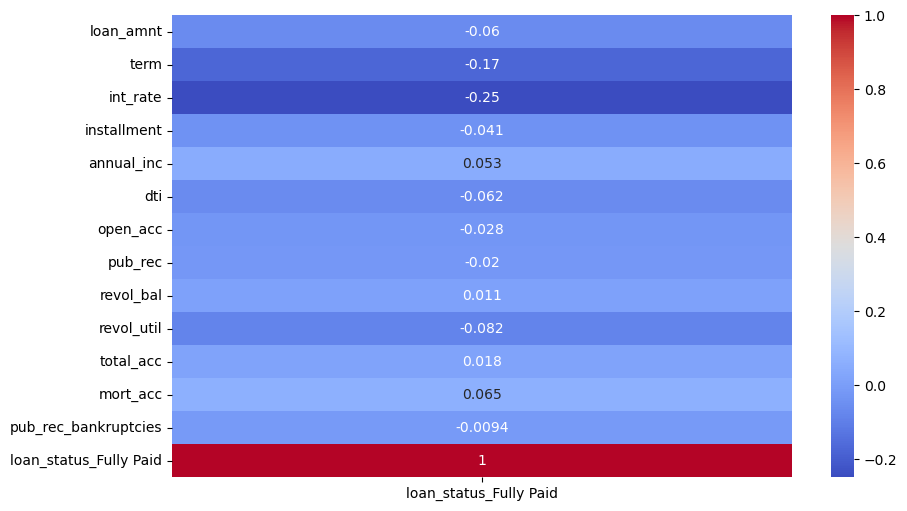

In [60]:
plt.figure(figsize=(10,6))
sms.heatmap(data_numeric_2.corr()[['loan_status_Fully Paid']], annot=True, cmap='coolwarm')
# we use [[]] for 'loan status..' to avoid shape mismatch by converting the 1d column to a 2d shape

We can drop the pub_rec_bankr. column. But in my case I see that the dropping this without filling the nans is giving me error. So I fill it and then drop the column.

In [62]:
data_dummies['pub_rec_bankruptcies'].agg(['mean','median','min','max'])

mean      0.121648
median    0.000000
min       0.000000
max       8.000000
Name: pub_rec_bankruptcies, dtype: float64

In [63]:
data_dummies['pub_rec_bankruptcies']=data_dummies['pub_rec_bankruptcies'].fillna(data_dummies['pub_rec_bankruptcies'].median())

In [64]:
data_dummies.isnull().sum()

loan_amnt         0
term              0
int_rate          0
installment       0
annual_inc        0
                 ..
pin_code_30723    0
pin_code_48052    0
pin_code_70466    0
pin_code_86630    0
pin_code_93700    0
Length: 87, dtype: int64

In [65]:
data_dummies.drop(['pub_rec_bankruptcies'], axis=1, inplace=True)

In [66]:
data_dummies.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,...,pin_code_00813,pin_code_05113,pin_code_11650,pin_code_22690,pin_code_29597,pin_code_30723,pin_code_48052,pin_code_70466,pin_code_86630,pin_code_93700
0,10000.0,36,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,...,False,False,False,True,False,False,False,False,False,False
1,8000.0,36,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,...,False,True,False,False,False,False,False,False,False,False
2,15600.0,36,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,...,False,True,False,False,False,False,False,False,False,False
3,7200.0,36,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,...,True,False,False,False,False,False,False,False,False,False
4,24375.0,60,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,...,False,False,True,False,False,False,False,False,False,False


One of the advantages of XGBoost is that it is based on decision trees, which are naturally robust to outliers.Decision trees split data based on feature values but do not get directly influenced by extreme values like linear models do. Even if outliers exist, they are usually placed in separate branches and do not affect the model's overall structure much.XGBoost builds trees iteratively and corrects the errors of previous trees, reducing the impact of outliers over multiple iterations.

## **2. Modelling with XG Boost**

## 2.1. Normal modelling 

In [69]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [70]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [71]:
X=data_dummies.drop(['loan_status_Fully Paid'], axis=1)
Y=data_dummies['loan_status_Fully Paid']
# don't use inplace in X 
# data_dummies.drop(['loan_status_Fully Paid'], axis=1, inplace=True) modifies data_dummies in place and returns None, meaning X becomes None.
# When Y = data_dummies['loan_status_Fully Paid'] is written, the column no longer exists in data_dummies, causing the "not found in axis" error.

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# we assign 20% values to test data and set the random_state to ensure consistency and not induce randomness in each run

In [74]:
Xg_model=XGBClassifier(tree_method='exact', eval_metric='logloss', random_state=42)
# for detailed notes on XG Boost and how it works, refer to: https://chatgpt.com/share/679f7a94-c0d8-8008-a27e-8762cf669372

In [75]:
Xg_model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [76]:
Y_pred = Xg_model.predict(X_test)
Y_pred_proba = Xg_model.predict_proba(X_test)[:, 1]

In [178]:
# Evaluate the model where we compare the test Y values with the predicted values of Y test i.e. Y_pred
accuracy = accuracy_score(Y_test, Y_pred)
roc_auc = roc_auc_score(Y_test, Y_pred_proba)
classification_report_output = classification_report(Y_test, Y_pred)

print(f"Accuracy: {accuracy}")
print(f"ROC AUC Score: {roc_auc}")
print("Classification Report:")
print(classification_report_output)

Accuracy: 0.8885690477994092
ROC AUC Score: 0.9074710838638416
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.48      0.63     15577
           1       0.89      0.99      0.93     63629

    accuracy                           0.89     79206
   macro avg       0.90      0.73      0.78     79206
weighted avg       0.89      0.89      0.87     79206



**Class 0(non-defaulters)** <br>
1. A high precision means that 92% of predicted non-defaulters are actually non-defaulters.
2. However, a low recall means out of the non-defaulters, the model identified only 48% of them i.e. a high false positive rate where a large number of non-defaulters are being classified as defaulters.
**Class 1(defaulters)** <br>
1. Excellent model for catching defaulters and hence, risk prevention. However, for business purpose it's a bad model since a lot of non-defaulters are being flagged as defaulters.

However, in our case the number of defaults is way less than the number of non-defaults. Hence, the result can be biased.<br>
If defaults are rare, Precision-Recall AUC (AUC-PR) is better than ROC-AUC.While both ROC AUC and PR AUC are metrics used to evaluate the performance of a binary classification model, the key difference lies in their sensitivity to class imbalance: ROC AUC is more suitable for balanced datasets, while PR AUC is better suited for highly imbalanced datasets where correctly identifying positive class instances is more crucial; essentially, ROC AUC considers both true positive and false positive rates equally, whereas PR AUC prioritizes the positive class by focusing on precision and recall. 

In [79]:
from sklearn.metrics import average_precision_score
auc_pr = average_precision_score(Y_test, Y_pred_proba)
print(f"AUC-PR: {auc_pr}")

AUC-PR: 0.9747586071184375


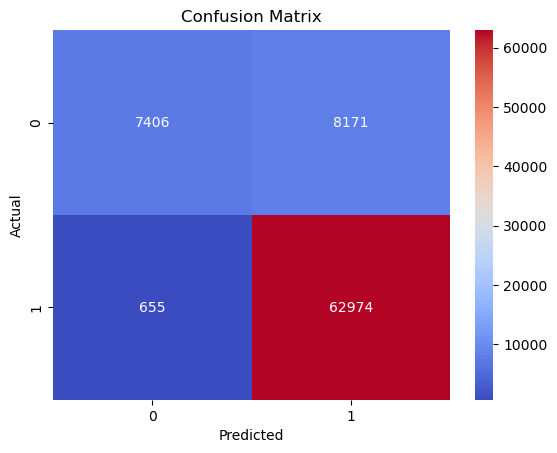

In [80]:
# Let's plot the confusion matrix to check false positives and false negatives 
cm = confusion_matrix(Y_test, Y_pred)
sms.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

we have a high false postive rate where actual non-defaulters are being classified as defaulters by our model, = 8171.<br>
we have a low flase negative rate, =655 which tells us that most of the actual defaulters are being caught by the model and only 655 actual defaulters are being classified as non-defaulters. This is a very good performance by our model.

In [82]:
Y_pred_prob = Xg_model.predict_proba(X_test)[:,1]

In [83]:
Y_pred_prob

array([7.5815809e-01, 9.9994075e-01, 7.2237694e-01, ..., 8.4726840e-01,
       9.9994659e-01, 2.1983302e-04], dtype=float32)

In [84]:
print(Y_pred_prob.shape)

(79206,)


## 3. Logistic regression

In [153]:
from sklearn.linear_model import LogisticRegression

Many machine learning models especially Logistic Regression, KNN, SVM, and Neural Networks — are sensitive to the scale of features, where 'feature' refers to a variable. By standardizing the scale of features (range, distribution) we transform the variables so that they have a mean of and a s.d. of 1. Study about gradiant descent, learning rate, log-loss function, and how logistic models work

In [162]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [164]:
# 4. Train the logistic regression model
log_model = LogisticRegression(max_iter=2000, class_weight='balanced')  # 'balanced' handles class imbalance
log_model.fit(X_train_scaled, Y_train)
# max_iter=1000 avoids convergence warnings on large datasets.

LogisticRegression(class_weight='balanced', max_iter=2000)

In [168]:
Y_pred_log=log_model.predict(X_test_scaled)
y_pred_log_proba=log_model.predict_proba(X_test_scaled)[:, 1]

In [172]:
accuracy_log = accuracy_score(Y_test, Y_pred_log)
roc_auc_log = roc_auc_score(Y_test, y_pred_log_proba)
classification_report_output_log = classification_report(Y_test, Y_pred_log)

print(f"Accuracy: {accuracy_log}")
print(f"ROC AUC Score: {roc_auc_log}")
print("Classification Report:")
print(classification_report_output_log)

Accuracy: 0.7964674393354039
ROC AUC Score: 0.9048827629621228
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.81      0.61     15577
           1       0.95      0.79      0.86     63629

    accuracy                           0.80     79206
   macro avg       0.72      0.80      0.74     79206
weighted avg       0.86      0.80      0.81     79206



Metric	Focus<br>
**Accuracy**	Overall % of correct predictions<br>
**Precision**	Of predicted positives, how many were actually positive<br>
**ROC AUC**	    How well the model ranks positives vs. negatives (across all thresholds)<br>
**Recall**      True positives<br>

**Recall vs Precision**
In recall, the question is 'Out of all actual defaulters (class 1), how many did the model correctly identify?' with focus on 'Don't miss any defaulters.'<br>
In precision, the question is 'Out of all predicted defaulters, how many were actually defaulters?' with focus on 'Be sure before calling someone a defaulter.'

**Model Results**
1. ROC AUC of 0.90+ is excellent the model ranks defaulters vs. non-defaulters very well across all thresholds.
2. High Precision for Class 1 (Defaulters): When the model predicts a defaulter, it's right 95% of the time great for avoiding false alarms.
3. Overall Accuracy (80%) is solid considering likely class imbalance.
4. Weighted average F1-score of 0.81 is quite strong it's handling both classes reasonably.
5. However, precision in 0 group (non-defaulters) is low. It answers 'Of all the loans the model predicted as non-defaulters (class 0), how many were actually non-defaulters?'. So a low precision signifies that a lot of predicted non-defaulters are actual defaulters.

## 4. Random Forest

In [188]:
from sklearn.ensemble import RandomForestClassifier

Random Forest is a machine learning algorithm that works by creating an ensemble of many decision trees to make more accurate and stable predictions.<br>
**Steps:** <br>
1. Build many decision trees: The algorithm creates multiple decision trees, each trained on a random subset of the dataset (called bootstrap sampling). This ensures each tree is slightly different.
2. Random feature selection: When splitting nodes within each tree, it considers only a random subset of features rather than all features, which increases diversity among trees and prevents overfitting.
3. Each tree predicts independently: Every tree makes its own prediction based on the data it was trained on.
4. Aggregate predictions: For classification problems, the final output is the class predicted by the majority of the trees (majority voting). For regression problems, it averages the predictions from all trees.
5. **Why it works well:** The randomness in both data and feature selection reduces overfitting, making the ensemble prediction more reliable than any individual tree.al tree.

In [199]:
# Initialize the model
rf_model = RandomForestClassifier(
    n_estimators=200,       # number of trees
    max_depth=None,         # let trees grow fully
    min_samples_split=2,    
# The minimum number of samples required to split an internal node is 2 (default). This means a node will be split if it has at least 2 samples, allowing deeper trees.
    min_samples_leaf=1,     
# The minimum number of samples required to be at a leaf node is 1 (default). This can create very small leaves, potentially capturing detailed patterns but also prone to overfitting.
    class_weight='balanced',# good for imbalanced datasets
#This option automatically adjusts weights inversely proportional to class frequencies in the training data.
#It helps handle imbalanced datasets by making the model pay more attention to minority class examples.
    random_state=42,        # reproducibility
    n_jobs=-1               # use all cores
)

In [201]:
#Training the model
RF_model = rf_model.fit(X_train,Y_train)

In [205]:
# Predictions
Y_pred_RF = rf_model.predict(X_test)
Y_pred_proba_RF = rf_model.predict_proba(X_test)[:, 1]  # probability for ROC AUC

In [207]:
# Evaluate
accuracy_RF = accuracy_score(Y_test, Y_pred_RF)
roc_auc_RF = roc_auc_score(Y_test, Y_pred_proba_RF)
classification_report_output_RF = classification_report(Y_test, Y_pred_RF)

print(f"Accuracy: {accuracy_RF}")
print(f"ROC AUC Score: {roc_auc_RF}")
print("Classification Report:")
print(classification_report_output_RF)

Accuracy: 0.8883165416761356
ROC AUC Score: 0.9031895234860733
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.46      0.62     15577
           1       0.88      0.99      0.93     63629

    accuracy                           0.89     79206
   macro avg       0.91      0.73      0.78     79206
weighted avg       0.89      0.89      0.87     79206

